<a href="https://www.kaggle.com/code/cicinguyen/employee-performance-and-satisfaction?scriptVersionId=140703306" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-productivity-and-satisfaction-hr-data/hr_dashboard_data.csv


# <span style="color:blue;"> Overview </span>

<span style="font-family:cursive;"> Create an interactive dashboard that leverages the provided dataset to explore and analyze factors impacting employee performance and satisfaction. This dashboard will provide HR professionals and managers with valuable insights to make informed decisions, enhance employee engagement, and improve organizational efficiency. </span>



In [2]:
# Libararies
import pandas as pd
import numpy as np

#Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from plotly.offline import iplot
from plotly.subplots import make_subplots
import missingno as msno
from pandas.plotting import parallel_coordinates
import altair as alt

#Library for building machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# <span style="color:blue;"> Data Overview </span>

## **1. Read data**

In [3]:
df = pd.read_csv('/kaggle/input/employee-productivity-and-satisfaction-hr-data/hr_dashboard_data.csv')
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [4]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 200
Number of columns: 11


## **2. Check for Duplicates**

In [5]:
duplicated_data = df.duplicated().any()
duplicated_data

False

## **3. Check for Missing Values**

### 3.1 Descriptive Statistics

In [6]:
df.describe()

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,34.650000,11.455000,46.755000,49.935000,2.883000,76619.245000
std,9.797318,6.408849,28.530068,28.934353,1.123263,27082.299202
min,22.000000,0.000000,0.000000,0.000000,1.000000,30231.000000
25%,26.000000,6.000000,23.000000,25.750000,1.900000,53080.500000
50%,32.000000,11.000000,45.000000,50.500000,2.800000,80540.000000
75%,41.000000,17.000000,70.000000,75.250000,3.900000,101108.250000
max,60.000000,25.000000,98.000000,100.000000,4.900000,119895.000000


In [7]:
#Missing values?
df.isnull().sum()

Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64

### 3.2 Data Type


In [8]:
df.dtypes

Name                      object
Age                        int64
Gender                    object
Projects Completed         int64
Productivity (%)           int64
Satisfaction Rate (%)      int64
Feedback Score           float64
Department                object
Position                  object
Joining Date              object
Salary                     int64
dtype: object

## **3. Data Distributions**

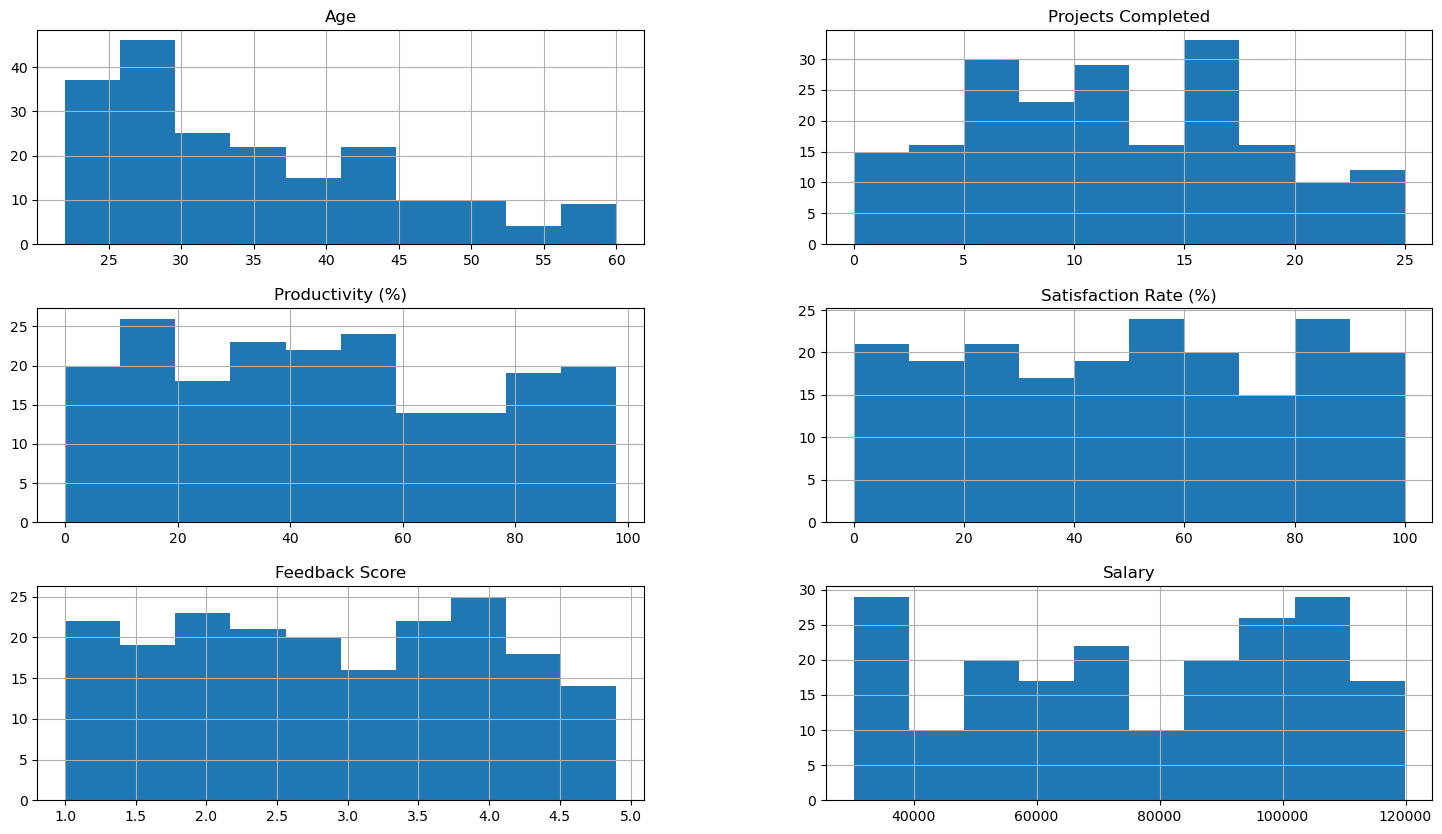

In [9]:
df.hist(figsize=(18,10))
plt.show()

# <span style="color:blue;"> Employee Distribution </span>

### 1. Age Distribution

In [10]:
histogram_trace = go.Histogram(
    x=df['Age'],
    nbinsx=10,
    histnorm='percent',
    name='Age Distribution'
)

fig = make_subplots(rows=1, cols=1)
fig.add_trace(histogram_trace)

fig.update_layout(
    title='Age Distribution of Employees',
    xaxis_title='Age',
    yaxis_title='Percent',
    template='plotly',
    width=800,
    height=500
)

iplot(fig)

### 2. Gender Distribution

In [11]:
gender_plot = df.copy()
gender_plot = gender_plot['Gender'].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type': 'pie'}]], subplot_titles=('',''))
fig.add_trace(go.Pie(values=gender_plot.values, labels=gender_plot.index), row=1, col=2)

fig.update_traces(hoverinfo='label',
                 textfont_size=18,
                 textposition='auto',
                 marker=dict(colors=["#9467BD", "#1F77B4"],
                            line=dict(color='white', width=2)))
fig.update_layout(title="<b>Gender Distribution of the Employees</b>",
                  title_x=0.5,
                  title_y=0.95,
                 template='xgridoff',
                 width = 800, height=500)
iplot(fig)

# <span style="color:blue;"> Performance Metrics Analysis </span>

### 1. Correlation Among Performance Metrics

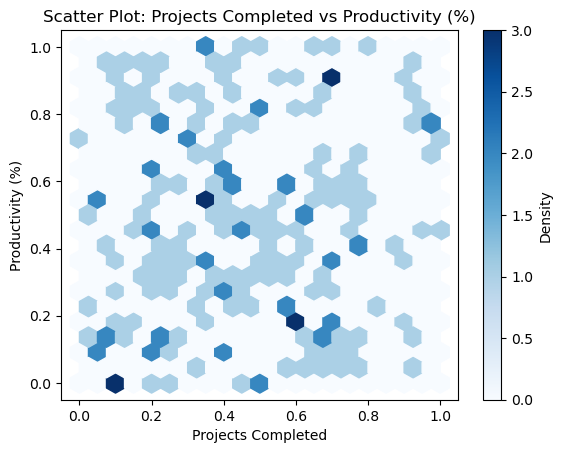

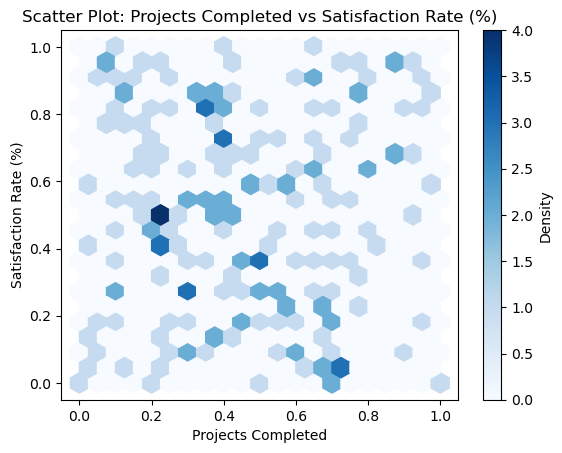

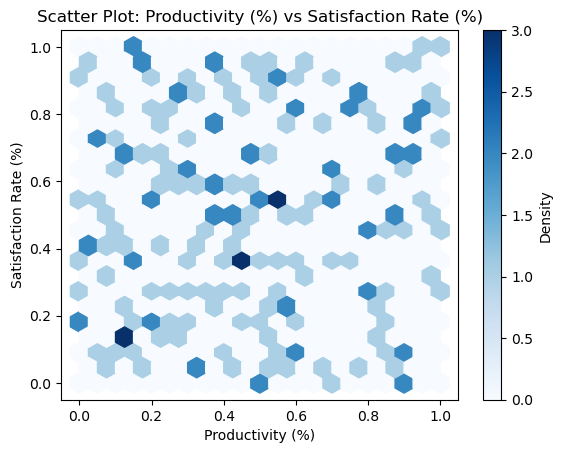

In [12]:
from itertools import combinations
perform_corr = df[['Projects Completed','Productivity (%)', 'Satisfaction Rate (%)']]
normalized_data = (perform_corr - perform_corr.min()) / (perform_corr.max() - perform_corr.min())

variables = normalized_data.columns

for var1, var2 in combinations(variables, 2):
    plt.hexbin(normalized_data[var1], normalized_data[var2], gridsize=20, cmap='Blues')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Scatter Plot: {var1} vs {var2}')
    plt.colorbar(label='Density')
    plt.show()

There's no clear relationship

### 2. Average Metrics for Different Project Completion Ranges

In [13]:
# Define a project completion range
low = (0,10)
med = (11,20)
high = (21,25)

# Categorize
df['Project Range'] = pd.cut(df['Projects Completed'], [0, 10, 20, 25], labels=['Low','Medium','High'])
avg_metrics = df.groupby('Project Range')[['Productivity (%)', 'Satisfaction Rate (%)']].mean().reset_index()

fig = px.bar(
    avg_metrics,
    x='Project Range',
    y=['Productivity (%)', 'Satisfaction Rate (%)'],
    labels={'x': 'Project Completion Range'},
    title='Average Metrics by Project Completion Range',
    height=500
)
fig.show()

#### 2.1 Productivity Analysis

* Low Project Completion: Employees completing fewer projects (0-10) have about 47.56% average productivity. 

*=> They might be working on more complex tasks or facing challenges that affect efficiency.*

* Medium Project Completion: Those completing moderate projects (11-20) show around 44.188% average productivity. 

*=> Factors like task complexity and time management could be impacting their productivity.*

* High Project Completion: Employees with high project completion (21-25) exhibit the highest productivity at about 55.058%. 

*=> They might excel in multitasking and task management.*

#### 2.2 Satisfaction Rate Analysis

* Low Project Completion: Employees with fewer projects have a 54.39% satisfaction rate. 

*=> Lighter workload could contribute to higher job satisfaction.*

* Medium Project Completion: Moderate project completions yield around 43.117% satisfaction. 

*=> Workload demands might affect satisfaction negatively.*

* High Project Completion: High project completions lead to a 61.176% satisfaction rate. 

*=> Some employees find satisfaction in challenging workloads, but burnout risks should be considered.*

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
              📝The relationship between project completion, productivity, and satisfaction is intricate and influenced by factors like workload complexity and personal preferences. 
</p>
</div>

# <span style="color:blue;"> Feedback Analysis </span>

### 1. Feedback Scores Distribution

In [14]:
fig = px.histogram(df, x='Feedback Score', nbins=5, title='Distribution of Feedback Scores')
fig.update_layout(xaxis_title='Feedback Score', yaxis_title='Frequency')
fig.show()

### 2. Correlation between Feedback Scores and Other Metrics

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/tmp/ipykernel_20/2083464158.py:6: UserWarning:

The figure layout has changed to tight



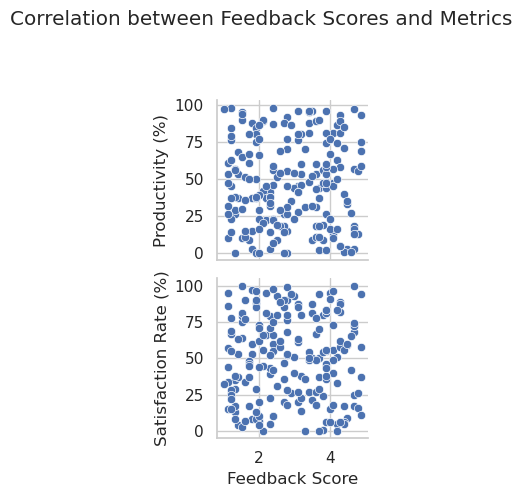

In [15]:
sns.set(style="whitegrid")  # Set the style to whitegrid
g = sns.pairplot(df, x_vars=['Feedback Score'], y_vars=['Productivity (%)', 'Satisfaction Rate (%)'], kind='scatter')

# Adjust the layout of the pairplot
g.fig.suptitle('Correlation between Feedback Scores and Metrics', y=1.02)  # Set the title above the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to avoid title overlap
plt.show()

In [16]:
corr_productivity = df['Feedback Score'].corr(df['Productivity (%)'])
corr_satisfaction = df['Feedback Score'].corr(df['Satisfaction Rate (%)'])
print(f"Correlation between Feedback Score and Productivity: {corr_productivity}")
print(f"Correlation between Feedback Score and Satisfaction Rate: {corr_satisfaction}")

Correlation between Feedback Score and Productivity: -0.005948122146927197
Correlation between Feedback Score and Satisfaction Rate: 0.008067658039439082


No correlation!?

# <span style="color:blue;"> Department and Position Analysis </span>

### 1. Employee Distribution by Department and Position

In [17]:
fig = px.treemap(
    df,
    path=['Department','Position'],
    values=[1] * len(df),
    title='Employee Distribution by Department and Position'
)
fig.show()

### 2. Average Productivity and Satisfaction rate by Department and Position

In [18]:
avg_metric_dept = df.groupby('Department')[['Productivity (%)', 'Satisfaction Rate (%)']].mean().reset_index()
avg_metric_pos = df.groupby('Position')[['Productivity (%)', 'Satisfaction Rate (%)']].mean().reset_index()

fig_dept = px.bar(
    avg_metric_dept,
    x='Department',
    y=['Productivity (%)', 'Satisfaction Rate (%)'],
    title='Average Metrics by Department',
    labels={'Department': 'Department'},
    height=500
)
fig_dept.update_layout(barmode='group')

fig_pos = px.bar(
    avg_metric_pos,
    x='Position',
    y=['Productivity (%)', 'Satisfaction Rate (%)'],
    title='Average Metrics by Position',
    labels={'Position': 'Position'},
    height=500
)
fig_pos.update_layout(barmode='group')

fig_dept.show()
fig_pos.show()

#### 2.1 Department Analysis 

##### Oberservations 

Among all the departments, the IT department stands out with the highest average productivity rate of 56.34% and satisfaction rate of 54.342%. This suggests that employees in the IT department are not only productive in their work but also have a high level of job satisfaction. 

Conversely, the Marketing department exhibits the lowest average productivity rate of 44.26% and satisfaction rate of 46.02%. This points towards potential challenges or areas for improvement within the Marketing team. 

##### Implications:

These findings suggest that there could be certain practices, team dynamics, or management approaches within the IT department that contribute to its success. These positive aspects could be studied and potentially adopted in other departments to enhance overall performance and job satisfaction.

For the Marketing department, the lower metrics could indicate potential challenges that need to be addressed. It might be necessary to assess factors such as workload, communication, work-life balance, and opportunities for skill development to improve both productivity and job satisfaction.

### 2.2 Position Analysis

##### Observations

* Interns: Despite low productivity (41.3%), interns exhibit high job satisfaction (55.26%). This could be due to limited project scope and a learning-focused role.

* * Junior Developers: Leading with high productivity (52.3%) and satisfactory job contentment (54.06%), Junior Developers demonstrate effective contribution and engagement.

Analysts: While analysts show lower productivity (44.545%), their job satisfaction is notably low (39.78%). Addressing factors causing dissatisfaction is crucial for this role.

##### Implications

* Interns' positive experience suggests a focus on learning and limited expectations.

* Junior Developers' balanced high productivity and satisfaction highlight effective role engagement.

* Analysts' low satisfaction and productivity underscore significant challenges that need resolution.

# <span style="color:blue;"> Salary vs. Performance/Satisfaction </span>

In [19]:
fig_prod = px.scatter(
    df,
    x='Salary',
    y='Productivity (%)',
    title='Salary vs Productivity',
    trendline='ols',
    labels={'Salary': 'Salary', 'Productivity (%)': 'Productivity (%)'},
    height=500
)
fig_satis = px.scatter(
    df,
    x='Salary',
    y='Satisfaction Rate (%)',
    title='Salary vs Satisfaction Rate',
    trendline='ols',
    labels={'Salary': 'Salary', 'Satisfaction Rate (%))': 'Satisfaction Rate (%)'},
    height=500
)

fig_prod.show()
fig_satis.show()

In [20]:
salary_ranges = pd.cut(df['Salary'], bins=[0, 40000, 60000, 80000, 100000, float('inf')],
                       labels=['<40k', '40k-60k', '60k-80k', '80k-100k', '100k+'])
average_metrics_by_salary = df.groupby(salary_ranges)[['Productivity (%)', 'Satisfaction Rate (%)']].mean().reset_index()

print(average_metrics_by_salary)

fig_avg_metric = px.bar(
    average_metrics_by_salary,
    x='Salary',
    y=['Productivity (%)', 'Satisfaction Rate (%)'],
    title='Average Metrics by Salary Range',
    labels={'Salary': 'Salary Range', 'value': 'Average Rate (%)'},
    height=500
)

fig_avg_metric.show()

     Salary  Productivity (%)  Satisfaction Rate (%)
0      <40k         41.333333              55.266667
1   40k-60k         52.314286              54.057143
2   60k-80k         44.545455              39.787879
3  80k-100k         45.023256              44.465116
4     100k+         48.711864              54.440678


##### Observations

* 40k Salary Range:

Productivity: Employees in the "<40k" salary range exhibit lower productivity compared to other ranges.

Satisfaction: Surprisingly, despite lower productivity, this salary range has the highest satisfaction rate at 55.26%. This could suggest that other factors, such as a positive work environment or job security, contribute to their job satisfaction

* 40k-60k Salary Range:

Productivity: Employees in the "40k-60k" salary range demonstrate the highest productivity levels among all ranges.

Satisfaction: While specific satisfaction rates are not provided for this range, this group's high productivity might be indicative of job satisfaction driven by competitive compensation.

* 60k-80k Salary Range:

Productivity: Employees in the "60k-80k" salary range have a productivity level around 44.5%.

Satisfaction: Interestingly, this range experiences the lowest satisfaction rate despite having relatively high productivity. This suggests that while compensation might be competitive, other factors such as job engagement or work-life balance might affect overall job satisfaction.

In [21]:
pip show ipywidgets

Name: ipywidgets
Version: 7.7.1
Summary: IPython HTML widgets for Jupyter
Home-page: http://ipython.org
Author: IPython Development Team
Author-email: ipython-dev@scipy.org
License: BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: ipykernel, ipython, ipython-genutils, jupyterlab-widgets, traitlets, widgetsnbextension
Required-by: bqplot, cufflinks, ipydatawidgets, ipyleaflet, ipympl, ipyvolume, ipyvue, pythreejs, qgrid, witwidget
Note: you may need to restart the kernel to use updated packages.


# Department Summary (Drop-down menu)

* Not shown well in the view

In [22]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create dropdown for filtering departments
department_dropdown = widgets.Dropdown(
    options=df['Department'].unique(),
    value=df['Department'].unique()[0],
    description='Department:'
)

# Create dropdown for filtering positions
position_dropdown = widgets.Dropdown(
    options=[],
    description='Position:'
)

# Create an output widget for displaying the summary
output = widgets.Output()

# Function to update position dropdown options based on selected department
def update_position_dropdown(change):
    selected_department = change.new
    positions_in_department = df[df['Department'] == selected_department]['Position'].unique()
    position_dropdown.options = positions_in_department
    position_dropdown.value = positions_in_department[0]  # Select the first position by default

# Function to generate summary
def generate_summary(selected_department, selected_position):
    department_data = df[df['Department'] == selected_department]
    position_data = department_data[department_data['Position'] == selected_position]
    
    avg_salary = position_data['Salary'].mean()
    employee_count = len(position_data)
    avg_satisfaction = position_data['Satisfaction Rate (%)'].mean()
    avg_productivity = position_data['Productivity (%)'].mean()
    
    summary = (
        f"Average Salary: ${avg_salary:.2f}\n"
        f"Employee Count: {employee_count}\n"
        f"Average Satisfaction: {avg_satisfaction:.2f}%\n"
        f"Average Productivity: {avg_productivity:.2f}%"
    )
    
    return summary

# Display the dropdown widgets
display(department_dropdown, position_dropdown)

# Display the output widget
display(output)

# Update position dropdown options when department is selected
department_dropdown.observe(update_position_dropdown, names='value')

# Display summary based on dropdown selections
def update_summary(change):
    selected_department = department_dropdown.value
    selected_position = position_dropdown.value
    
    # Clear previous output
    with output:
        clear_output(wait=True)
        summary = generate_summary(selected_department, selected_position)
        print(summary)

position_dropdown.observe(update_summary, names='value')


Dropdown(description='Department:', options=('Marketing', 'IT', 'Sales', 'HR', 'Finance'), value='Marketing')

Dropdown(description='Position:', options=(), value=None)

Output()